<a href="https://colab.research.google.com/github/Atul-barnwal/Aiml/blob/main/Student_project_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sample dataset
data = {
    'StudentID': np.arange(1, 21),
    'AttendanceRate': [90, 60, 50, 95, 40, 85, 70, 65, 80, 55, 75, 68, 92, 88, 45, 58, 73, 77, 62, 83],
    'StudyTime': [12, 6, 4, 15, 3, 10, 8, 7, 9, 5, 11, 6, 14, 13, 2, 5, 9, 10, 6, 11],
    'FinalExamScore': [85, 60, 45, 90, 35, 80, 70, 65, 75, 50, 82, 62, 88, 86, 30, 52, 73, 78, 58, 83],
    'Pass/Fail': [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
}

# Converted to DataFrame
df = pd.DataFrame(data)


print(df.head())


   StudentID  AttendanceRate  StudyTime  FinalExamScore  Pass/Fail
0          1              90         12              85          1
1          2              60          6              60          1
2          3              50          4              45          0
3          4              95         15              90          1
4          5              40          3              35          0


Linear Regression Results:
Mean Squared Error (MSE): 28.507907742301118
R² Score: 0.7586915874152739


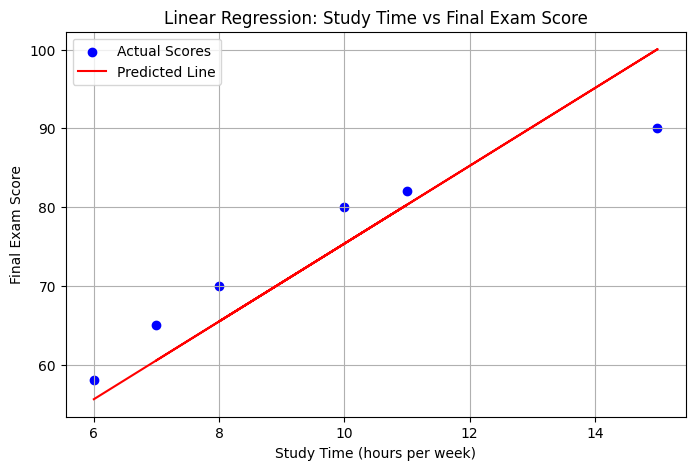

In [8]:

# LINEAR REGRESSION - Predict FinalExamScore


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['StudyTime']]
y = df['FinalExamScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# data visualisation
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.title('Linear Regression: Study Time vs Final Exam Score')
plt.xlabel('Study Time (hours per week)')
plt.ylabel('Final Exam Score')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score

X_log = df[['AttendanceRate', 'StudyTime']]
y_log = df['Pass/Fail']

X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=12)

logr = LogisticRegression()
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Logistic Regression Results:")
print("Accuracy:", acc)
print("Confusion Matrix:")
print(conf_matrix)
print("Recall:", recall)
print("Precision:", precision)


Logistic Regression Results:
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 3]]
Recall: 1.0
Precision: 1.0


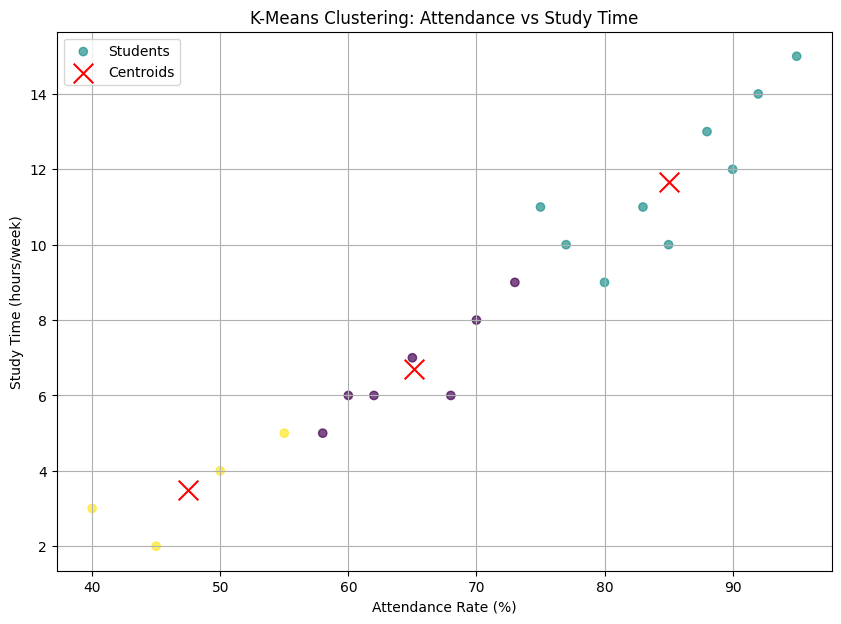

In [8]:
# ---------------------------------------------
# K-MEANS CLUSTERING - Group Students by
# AttendanceRate and StudyTime
# ---------------------------------------------

from sklearn.cluster import KMeans

X_cluster = df[['AttendanceRate', 'StudyTime']].values

k = 3

kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto')

kmeans_model.fit(X_cluster)


labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

df['Cluster'] = labels


# Plotting Clusters and Centroids for data visualisation
plt.figure(figsize=(10, 7))
plt.title("K-Means Clustering: Attendance vs Study Time")
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=labels, cmap='viridis', alpha=0.7, label='Students')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.xlabel("Attendance Rate (%)")
plt.ylabel("Study Time (hours/week)")
plt.legend()
plt.grid(True)
plt.show()
